In [7]:
import pandas as pd

In [8]:
dataset1 = '../data/AirVisual.csv'
datasetAirPort = '../data/airportdata.csv'

In [9]:
#loading data
data = pd.read_csv(dataset1)


In [10]:
#loading data
dataPort = pd.read_csv(datasetAirPort)
#peeking int o the data
#display(data1.isna().sum())
dataPort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84925 entries, 0 to 84924
Data columns (total 11 columns):
station               84925 non-null object
valid                 84925 non-null object
lon                   84925 non-null float64
lat                   84925 non-null float64
tmpc                  84557 non-null float64
relh                  84101 non-null float64
drct                  84736 non-null float64
sped                  84823 non-null float64
vsby                  84835 non-null float64
gust_mph              26 non-null float64
peak_wind_gust_mph    0 non-null float64
dtypes: float64(9), object(2)
memory usage: 7.1+ MB


In [11]:
#peeking into the data
data.head()

,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
0,0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN
1,1,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,413.0,30.0,62.0,NaN,NaN
2,2,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,416.0,30.0,63.0,NaN,NaN
3,3,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,419.0,29.0,58.0,NaN,NaN
4,4,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,432.0,27.0,70.0,NaN,NaN


In [12]:
#columns
list(data.columns)

['Unnamed: 0',
 'SerialNumber',
 'City',
 'Name',
 'longitude',
 'latitude',
 'FirstOnline',
 'Datetime',
 'PM2.5',
 'USAQI',
 'CO2',
 'Temperature',
 'RelativeHumidity',
 'Outdoor PM2.5',
 'OutdoorUSAQI']

In [13]:
#shape of data
data.shape

(151256, 15)

In [14]:
#null values by column
data.isna().sum()

Unnamed: 0              0
SerialNumber        14961
City                56219
Name                    0
longitude           56219
latitude            56219
FirstOnline         56219
Datetime                0
PM2.5                   0
USAQI                   0
CO2                 14961
Temperature          1499
RelativeHumidity     1499
Outdoor PM2.5       55150
OutdoorUSAQI        55150
dtype: int64

In [15]:
#null values in Datetime: 0
data["Datetime"].isna().sum()

0

In [16]:
#What is SerialNumber? It is repeated. 
data.SerialNumber.head()

0    4ypxth4
1    4ypxth4
2    4ypxth4
3    4ypxth4
4    4ypxth4
Name: SerialNumber, dtype: object

In [17]:
#null values in City:
data["City"].isna().sum()

56219

In [18]:
#filling null values in city with Karachi
data["City"].fillna("Karachi", inplace = True)

In [19]:
#null values by column again to verify that City has no null values
data.isna().sum()

Unnamed: 0              0
SerialNumber        14961
City                    0
Name                    0
longitude           56219
latitude            56219
FirstOnline         56219
Datetime                0
PM2.5                   0
USAQI                   0
CO2                 14961
Temperature          1499
RelativeHumidity     1499
Outdoor PM2.5       55150
OutdoorUSAQI        55150
dtype: int64

## Key takeaways from Null Values:
1. Lat, Lon, and FirstOnLine has the same number of null values as City.
2. How to deal with 1? We treated City by replacing the nulls with Karachi but we can't do the same with the other three columns.
3. How to deal with null values of the other columns, we could try replacing it with the mean perhaps? 
4. Both Outdoor PM2.5 and OutdootUSAQI have a considerable number of null values (around 60k), we will have to think of a good way to deal with these.
5. What is Serial Number, it also has null values. (many repeated values as well)


## Exploring Serial Number

In [20]:
#let's look at unique Sno values and their count
data.SerialNumber.unique()

array(['4ypxth4', 'aj9xpaw', 'crp4y7m', 'kuh6xuc', 'kxvyx76', 'rjpamt6',
       'u7cwkla', '4cvxlkt', '997gv7h', 'a67pmak', 'ajgclt7', 'awawxwx',
       'cpguxuc', 'g6gs9ls', 'lllm4gm', 'lwpu64p', 'm9cuxv7', 'sarpstt',
       'tj4gawm', 'tlxa6x7', 'twa67s6', 'yggpgpl', nan], dtype=object)

In [21]:
#unique Serial Numbers
uniqueSNo = data.SerialNumber.unique()
len(uniqueSNo)

23

In [22]:
#Looking at what each SerialNumber corresponds to:
for i in uniqueSNo:
    display(data.loc[data.SerialNumber == i].head(1))
    

,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
0,0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
15475,24178,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-11-03 13:00:00,28.0,84,595.0,24.0,48.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
25936,34647,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-26 00:00:00,48.0,132,485.0,27.0,35.0,31.9,92.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
35798,50484,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 13:00:00,446.0,464,509.0,22.0,83.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
42923,59482,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 13:00:00,55.0,149,896.0,24.0,77.0,151.0,201.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
50983,67636,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 08:00:00,30.0,88,409.0,29.0,86.0,23.8,76.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
63914,86480,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 13:00:00,153.0,203,428.0,21.0,58.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
74721,103214,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 06:00:00,24.0,76,431.0,27.0,80.0,15.8,59.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
78284,106777,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-09-14 14:00:00,62.0,154,631.0,29.0,74.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
80382,108875,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 10:00:00,1799.0,1357,414.0,28.0,80.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
84962,113455,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 23:00:00,24.0,76,432.0,28.0,80.0,14.0,55.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
89088,117581,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 19:00:00,124.0,186,471.0,23.0,74.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
91102,119595,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 19:00:00,100.0,174,430.0,29.0,42.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
96769,125262,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 23:00:00,27.0,82,411.0,27.0,78.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
100860,129353,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 19:00:00,83.0,165,423.0,30.0,40.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
107153,135646,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 21:00:00,1799.0,1357,410.0,28.0,85.0,8.1,33.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
110988,139481,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 19:00:00,86.0,167,514.0,29.0,53.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
114177,142670,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 20:00:00,30.0,88,409.0,30.0,60.0,36.1,102.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
117855,146348,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 14:00:00,55.0,149,424.0,36.0,34.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
120177,148670,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 19:00:00,95.0,171,437.0,32.0,36.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
125494,153987,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 19:00:00,86.0,167,492.0,30.0,47.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
131918,160411,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 19:00:00,98.0,173,429.0,30.0,39.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI


In [23]:
#null values
data.SerialNumber.isna().sum()

14961

### Key takeaways from Serial Number:
1. each unique serial number corresponds to a different location (i.e. Name) 
2. There are 23 unique values which means 22 locations (22 actually, 23rd is Nan)

In [24]:
#null values in Name i.e. location
data.Name.isna().sum()

0

In [25]:
display(len(data.Name.unique()))
display(len(data.SerialNumber.unique()))

28

23

In [26]:
data1 = data.SerialNumber.isna()
nullNames = data[data1].Name.unique()

In [27]:
uniqueSNo = data.SerialNumber.unique()
names = []
for i in uniqueSNo[:-1]:
    names.append(list(data.loc[data.SerialNumber == i].head(1).values)[0][2])
display(names)
#the locations corresponding to null values of serial number don't have non-null values in the entire dataset.

['Karachi',
 'Karachi',
 'Peshawar',
 'Lahore',
 'Lahore',
 'Karachi',
 'Islamabad',
 'Karachi',
 'Karachi',
 'Karachi',
 'Karachi',
 'Lahore',
 'Karachi',
 'Karachi',
 'Karachi',
 'Karachi',
 'Karachi',
 'Bahawalpur',
 'Karachi',
 'Karachi',
 'Karachi',
 'Karachi']

In [28]:
uniqueSNo = data.SerialNumber.unique()
SNoToName = {}
for i in uniqueSNo[:-1]:
    SNoToName[list(data.loc[data.SerialNumber == i].head(1).values)[0][2]] = i
display(SNoToName)

{'Karachi': 'yggpgpl',
 'Peshawar': 'crp4y7m',
 'Lahore': 'awawxwx',
 'Islamabad': 'u7cwkla',
 'Bahawalpur': 'sarpstt'}

In [29]:
#dealing with null values in Serial Number
#data.SerialNumber.fillna(SNoToName[list(data.loc[data.SerialNumber == i].head(1).values)[0][2]], inplace = True)
data.isna().sum()
uniqueName = data.Name.unique()
for i in uniqueName:
    display(data.loc[data.Name == i].head())
 

,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
0,0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN
1,1,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,413.0,30.0,62.0,NaN,NaN
2,2,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,416.0,30.0,63.0,NaN,NaN
3,3,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,419.0,29.0,58.0,NaN,NaN
4,4,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,432.0,27.0,70.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
15475,24178,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-11-03 13:00:00,28.0,84,595.0,24.0,48.0,NaN,NaN
15476,24179,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-11-03 12:00:00,31.0,91,603.0,25.0,51.0,NaN,NaN
15477,24180,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-09-15 17:00:00,35.0,99,660.0,28.0,50.0,NaN,NaN
15478,24181,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-09-15 16:00:00,37.0,105,701.0,28.0,51.0,NaN,NaN
15479,24182,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-09-15 15:00:00,20.0,68,628.0,28.0,51.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
25936,34647,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-26 00:00:00,48.0,132,485.0,27.0,35.0,31.9,92.0
25937,34648,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-25 23:00:00,62.0,154,506.0,27.0,36.0,31.9,92.0
25938,34649,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-25 22:00:00,77.0,162,578.0,27.0,38.0,31.9,92.0
25939,34650,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-25 21:00:00,82.0,165,758.0,27.0,39.0,31.9,92.0
25940,34651,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-25 20:00:00,91.0,169,1004.0,27.0,41.0,31.9,92.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
35798,50484,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 13:00:00,446.0,464,509.0,22.0,83.0,NaN,NaN
35799,50485,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 12:00:00,374.0,417,501.0,21.0,84.0,NaN,NaN
35800,50486,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 11:00:00,342.0,392,494.0,21.0,87.0,NaN,NaN
35801,50487,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 10:00:00,438.0,459,496.0,20.0,89.0,NaN,NaN
35802,50488,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 09:00:00,496.0,497,495.0,19.0,90.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
42923,59482,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 13:00:00,55.0,149,896.0,24.0,77.0,151.0,201.0
42924,59483,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 12:00:00,277.0,327,686.0,24.0,78.0,146.1,198.0
42925,59484,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 10:00:00,270.0,320,1002.0,21.0,82.0,197.5,248.0
42926,59485,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 09:00:00,482.0,488,521.0,21.0,80.0,235.9,286.0
42927,59486,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 08:00:00,465.0,477,580.0,20.0,83.0,200.4,250.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
50983,67636,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 08:00:00,30.0,88,409.0,29.0,86.0,23.8,76.0
50984,67637,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 07:00:00,32.0,93,406.0,29.0,86.0,18.3,64.0
50985,67638,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 06:00:00,20.0,68,410.0,29.0,84.0,16.8,61.0
50986,67639,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 05:00:00,18.0,63,409.0,29.0,82.0,19.0,65.0
50987,67640,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 04:00:00,17.0,61,415.0,29.0,82.0,19.2,66.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
63914,86480,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 13:00:00,153.0,203,428.0,21.0,58.0,NaN,NaN
63915,86481,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 12:00:00,150.0,200,410.0,21.0,60.0,NaN,NaN
63916,86482,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 11:00:00,143.0,196,424.0,21.0,62.0,NaN,NaN
63917,86483,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 10:00:00,161.0,211,443.0,20.0,65.0,NaN,NaN
63918,86484,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 09:00:00,230.0,280,478.0,19.0,69.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
74721,103214,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 06:00:00,24.0,76,431.0,27.0,80.0,15.8,59.0
74722,103215,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 05:00:00,24.0,76,432.0,27.0,79.0,15.7,59.0
74723,103216,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 04:00:00,21.0,70,430.0,27.0,80.0,16.5,60.0
74724,103217,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 03:00:00,24.0,76,443.0,27.0,81.0,15.0,57.0
74725,103218,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 02:00:00,24.0,76,426.0,27.0,79.0,16.7,61.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
78284,106777,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-09-14 14:00:00,62.0,154,631.0,29.0,74.0,NaN,NaN
78285,106778,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-09-14 13:00:00,116.0,182,671.0,30.0,72.0,NaN,NaN
78286,106779,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-07-31 11:00:00,169.0,219,616.0,36.0,53.0,17.6,63.0
78287,106780,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-07-31 04:00:00,63.0,155,409.0,29.0,74.0,10.1,42.0
78288,106781,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-07-30 03:00:00,44.0,122,405.0,28.0,77.0,5.6,23.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
80382,108875,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 10:00:00,1799.0,1357,414.0,28.0,80.0,NaN,NaN
80383,108876,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 09:00:00,1799.0,1357,412.0,28.0,82.0,NaN,NaN
80384,108877,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 08:00:00,1799.0,1357,416.0,28.0,85.0,NaN,NaN
80385,108878,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 07:00:00,1799.0,1357,431.0,27.0,88.0,NaN,NaN
80386,108879,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 06:00:00,1799.0,1357,414.0,27.0,87.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
84962,113455,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 23:00:00,24.0,76,432.0,28.0,80.0,14.0,55.0
84963,113456,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 22:00:00,27.0,82,434.0,28.0,80.0,13.4,54.0
84964,113457,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 21:00:00,28.0,84,436.0,28.0,79.0,13.1,53.0
84965,113458,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 20:00:00,28.0,84,437.0,28.0,78.0,13.4,54.0
84966,113459,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 19:00:00,29.0,86,437.0,29.0,77.0,13.3,54.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
89088,117581,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 19:00:00,124.0,186,471.0,23.0,74.0,NaN,NaN
89089,117582,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 18:00:00,113.0,181,460.0,24.0,71.0,NaN,NaN
89090,117583,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 17:00:00,83.0,165,442.0,26.0,62.0,NaN,NaN
89091,117584,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 16:00:00,75.0,161,427.0,28.0,53.0,NaN,NaN
89092,117585,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 15:00:00,63.0,155,428.0,29.0,49.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
91102,119595,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 19:00:00,100.0,174,430.0,29.0,42.0,NaN,NaN
91103,119596,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 18:00:00,75.0,161,424.0,30.0,46.0,NaN,NaN
91104,119597,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 17:00:00,70.0,158,421.0,31.0,49.0,NaN,NaN
91105,119598,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 16:00:00,60.0,153,417.0,33.0,38.0,NaN,NaN
91106,119599,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 15:00:00,70.0,158,418.0,33.0,36.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
96769,125262,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 23:00:00,27.0,82,411.0,27.0,78.0,NaN,NaN
96770,125263,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 22:00:00,30.0,88,415.0,27.0,78.0,NaN,NaN
96771,125264,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 21:00:00,33.0,95,420.0,27.0,77.0,NaN,NaN
96772,125265,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 20:00:00,32.0,93,421.0,27.0,76.0,NaN,NaN
96773,125266,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 19:00:00,33.0,95,421.0,28.0,75.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
100860,129353,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 19:00:00,83.0,165,423.0,30.0,40.0,NaN,NaN
100861,129354,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 18:00:00,67.0,157,418.0,31.0,43.0,NaN,NaN
100862,129355,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 17:00:00,63.0,155,412.0,32.0,42.0,NaN,NaN
100863,129356,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 16:00:00,54.0,146,409.0,33.0,34.0,NaN,NaN
100864,129357,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 15:00:00,58.0,152,415.0,36.0,30.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
107153,135646,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 21:00:00,1799.0,1357,410.0,28.0,85.0,8.1,33.0
107154,135647,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 20:00:00,1799.0,1357,411.0,28.0,83.0,8.6,36.0
107155,135648,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 19:00:00,1799.0,1357,414.0,29.0,81.0,8.5,35.0
107156,135649,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 18:00:00,1799.0,1357,417.0,30.0,78.0,8.4,35.0
107157,135650,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 17:00:00,1799.0,1357,418.0,31.0,75.0,8.7,36.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
110988,139481,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 19:00:00,86.0,167,514.0,29.0,53.0,NaN,NaN
110989,139482,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 18:00:00,90.0,169,479.0,29.0,52.0,NaN,NaN
110990,139483,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 09:00:00,73.0,160,491.0,28.0,55.0,NaN,NaN
110991,139484,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 08:00:00,89.0,168,498.0,28.0,55.0,NaN,NaN
110992,139485,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 07:00:00,90.0,169,490.0,28.0,55.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
114177,142670,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 20:00:00,30.0,88,409.0,30.0,60.0,36.1,102.0
114178,142671,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 19:00:00,35.0,99,410.0,30.0,60.0,30.0,88.0
114179,142672,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 18:00:00,34.0,97,408.0,31.0,63.0,37.1,105.0
114180,142673,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 17:00:00,22.0,72,406.0,31.0,62.0,38.4,108.0
114181,142674,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 16:00:00,18.0,63,400.0,31.0,61.0,42.2,117.0


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
117855,146348,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 14:00:00,55.0,149,424.0,36.0,34.0,NaN,NaN
117856,146349,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 13:00:00,52.0,141,423.0,37.0,24.0,NaN,NaN
117857,146350,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 11:00:00,67.0,157,420.0,35.0,24.0,NaN,NaN
117858,146351,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 10:00:00,70.0,158,420.0,34.0,30.0,NaN,NaN
117859,146352,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 09:00:00,70.0,158,419.0,32.0,32.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
120177,148670,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 19:00:00,95.0,171,437.0,32.0,36.0,NaN,NaN
120178,148671,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 18:00:00,89.0,168,430.0,32.0,36.0,NaN,NaN
120179,148672,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 17:00:00,66.0,156,421.0,34.0,38.0,NaN,NaN
120180,148673,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 16:00:00,73.0,160,427.0,38.0,28.0,NaN,NaN
120181,148674,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 15:00:00,84.0,166,436.0,39.0,27.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
125494,153987,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 19:00:00,86.0,167,492.0,30.0,47.0,NaN,NaN
125495,153988,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 18:00:00,69.0,158,525.0,30.0,53.0,NaN,NaN
125496,153989,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 17:00:00,69.0,158,478.0,31.0,56.0,NaN,NaN
125497,153990,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 16:00:00,61.0,154,469.0,33.0,46.0,NaN,NaN
125498,153991,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 15:00:00,54.0,146,471.0,33.0,43.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
131918,160411,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 19:00:00,98.0,173,429.0,30.0,39.0,NaN,NaN
131919,160412,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 18:00:00,82.0,165,424.0,30.0,39.0,NaN,NaN
131920,160413,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 17:00:00,70.0,158,417.0,32.0,39.0,NaN,NaN
131921,160414,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 16:00:00,61.0,154,415.0,36.0,29.0,NaN,NaN
131922,160415,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 15:00:00,42.0,117,416.0,38.0,17.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
136295,164788,NaN,Lahore,1FCC Gulberg Syed Maratib Ali Road,74.337812,31.529309,2018-01-11 13:00:00,2018-07-03 07:00:00,40.50,113,NaN,25.0,88.0,NaN,NaN
136296,164789,NaN,Lahore,1FCC Gulberg Syed Maratib Ali Road,74.337812,31.529309,2018-01-11 13:00:00,2018-07-03 06:00:00,47.84,131,NaN,24.0,94.0,NaN,NaN
136297,164790,NaN,Lahore,1FCC Gulberg Syed Maratib Ali Road,74.337812,31.529309,2018-01-11 13:00:00,2018-07-03 05:00:00,34.25,97,NaN,24.0,94.0,NaN,NaN
136298,164791,NaN,Lahore,1FCC Gulberg Syed Maratib Ali Road,74.337812,31.529309,2018-01-11 13:00:00,2018-07-03 04:00:00,44.16,122,NaN,23.0,94.0,NaN,NaN
136299,164792,NaN,Lahore,1FCC Gulberg Syed Maratib Ali Road,74.337812,31.529309,2018-01-11 13:00:00,2018-07-03 03:00:00,41.11,115,NaN,23.0,100.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
137461,165954,NaN,Lahore,Abu Bakar Block,74.323003,31.511676,2018-09-01 08:00:00,2018-10-18 14:00:00,83.66,166,NaN,30.0,42.0,NaN,NaN
137462,165955,NaN,Lahore,Abu Bakar Block,74.323003,31.511676,2018-09-01 08:00:00,2018-10-18 13:00:00,97.19,173,NaN,29.0,45.0,NaN,NaN
137463,165956,NaN,Lahore,Abu Bakar Block,74.323003,31.511676,2018-09-01 08:00:00,2018-10-18 12:00:00,131.80,190,NaN,28.0,48.0,NaN,NaN
137464,165957,NaN,Lahore,Abu Bakar Block,74.323003,31.511676,2018-09-01 08:00:00,2018-10-18 11:00:00,258.88,309,NaN,27.0,51.0,NaN,NaN
137465,165958,NaN,Lahore,Abu Bakar Block,74.323003,31.511676,2018-09-01 08:00:00,2018-10-18 10:00:00,300.80,351,NaN,23.0,61.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
138552,167045,NaN,Rawalpindi,Bahria Town Phase 2,73.121466,33.55402,2018-08-28 07:00:00,2018-10-18 14:00:00,45.32,125,NaN,28.0,37.0,NaN,NaN
138553,167046,NaN,Rawalpindi,Bahria Town Phase 2,73.121466,33.55402,2018-08-28 07:00:00,2018-10-18 13:00:00,51.93,141,NaN,27.0,36.0,NaN,NaN
138554,167047,NaN,Rawalpindi,Bahria Town Phase 2,73.121466,33.55402,2018-08-28 07:00:00,2018-10-18 12:00:00,49.82,136,NaN,27.0,36.0,NaN,NaN
138555,167048,NaN,Rawalpindi,Bahria Town Phase 2,73.121466,33.55402,2018-08-28 07:00:00,2018-10-18 11:00:00,63.98,155,NaN,24.0,47.0,NaN,NaN
138556,167049,NaN,Rawalpindi,Bahria Town Phase 2,73.121466,33.55402,2018-08-28 07:00:00,2018-10-18 10:00:00,84.05,166,NaN,22.0,53.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
139672,168165,NaN,Islamabad,Kachnar Park,73.076654,33.675511,2018-04-16 09:00:00,2018-10-18 12:00:00,49.52,135,NaN,27.0,36.0,NaN,NaN
139673,168166,NaN,Islamabad,Kachnar Park,73.076654,33.675511,2018-04-16 09:00:00,2018-10-18 11:00:00,46.09,127,NaN,24.0,47.0,NaN,NaN
139674,168167,NaN,Islamabad,Kachnar Park,73.076654,33.675511,2018-04-16 09:00:00,2018-10-18 10:00:00,36.69,104,NaN,22.0,53.0,NaN,NaN
139675,168168,NaN,Islamabad,Kachnar Park,73.076654,33.675511,2018-04-16 09:00:00,2018-10-18 09:00:00,28.77,86,NaN,19.0,63.0,NaN,NaN
139676,168169,NaN,Islamabad,Kachnar Park,73.076654,33.675511,2018-04-16 09:00:00,2018-10-18 08:00:00,28.82,86,NaN,17.0,67.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
143112,171605,NaN,Lahore,NETSOL - Ghazi Road Interchange,74.421947,31.497171,2018-01-11 13:00:00,2018-10-18 14:00:00,90.90,169,NaN,30.0,42.0,NaN,NaN
143113,171606,NaN,Lahore,NETSOL - Ghazi Road Interchange,74.421947,31.497171,2018-01-11 13:00:00,2018-10-18 13:00:00,121.31,185,NaN,29.0,45.0,NaN,NaN
143114,171607,NaN,Lahore,NETSOL - Ghazi Road Interchange,74.421947,31.497171,2018-01-11 13:00:00,2018-10-18 12:00:00,222.29,272,NaN,28.0,48.0,NaN,NaN
143115,171608,NaN,Lahore,NETSOL - Ghazi Road Interchange,74.421947,31.497171,2018-01-11 13:00:00,2018-10-18 11:00:00,202.93,253,NaN,27.0,51.0,NaN,NaN
143116,171609,NaN,Lahore,NETSOL - Ghazi Road Interchange,74.421947,31.497171,2018-01-11 13:00:00,2018-10-18 10:00:00,293.14,343,NaN,23.0,61.0,NaN,NaN


,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
147394,175887,NaN,Faisalabad,Batala Colony,73.101371,31.400796,2018-01-04 08:00:00,2018-10-18 14:00:00,71.14,159,NaN,32.0,41.0,NaN,NaN
147395,175888,NaN,Faisalabad,Batala Colony,73.101371,31.400796,2018-01-04 08:00:00,2018-10-18 13:00:00,95.27,172,NaN,29.0,46.0,NaN,NaN
147396,175889,NaN,Faisalabad,Batala Colony,73.101371,31.400796,2018-01-04 08:00:00,2018-10-18 12:00:00,113.60,181,NaN,26.0,56.0,NaN,NaN
147397,175890,NaN,Faisalabad,Batala Colony,73.101371,31.400796,2018-01-04 08:00:00,2018-10-18 11:00:00,127.63,188,NaN,26.0,56.0,NaN,NaN
147398,175891,NaN,Faisalabad,Batala Colony,73.101371,31.400796,2018-01-04 08:00:00,2018-10-18 10:00:00,130.31,190,NaN,26.0,56.0,NaN,NaN


# Datatypes

In [30]:
display(sorted(data["Datetime"])[:10])

['2016-10-06 14:00:00',
 '2016-10-06 15:00:00',
 '2016-10-06 17:00:00',
 '2016-10-06 18:00:00',
 '2016-10-06 19:00:00',
 '2016-10-06 20:00:00',
 '2016-10-06 21:00:00',
 '2016-10-06 22:00:00',
 '2016-10-06 23:00:00',
 '2016-10-07 00:00:00']

In [31]:
data.dtypes

Unnamed: 0            int64
SerialNumber         object
City                 object
Name                 object
longitude           float64
latitude            float64
FirstOnline          object
Datetime             object
PM2.5               float64
USAQI                 int64
CO2                 float64
Temperature         float64
RelativeHumidity    float64
Outdoor PM2.5       float64
OutdoorUSAQI        float64
dtype: object

## Key takeaways from datatypes:
1. FirstOnLine, datetime should be consistent, not object. possible reasons for this could be that there are null values in FirstOnline and datetime is a composite attribute.
2. City and Name should be str
3. Serial Number should be str.

In [32]:
data.corr('spearman') 

,Unnamed: 0,longitude,latitude,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
Unnamed: 0,1.000000,0.549962,0.323524,0.222986,0.223072,-0.102279,0.157077,0.067451,-0.260862,-0.260696
longitude,0.549962,1.000000,0.604845,0.375155,0.375220,0.444778,-0.170806,-0.090199,0.129000,0.128904
latitude,0.323524,0.604845,1.000000,0.169753,0.169767,0.437619,-0.177330,-0.325507,0.109367,0.108957
PM2.5,0.222986,0.375155,0.169753,1.000000,0.999983,0.316706,-0.204948,-0.132029,0.300887,0.300899
USAQI,0.223072,0.375220,0.169767,0.999983,1.000000,0.316688,-0.204911,-0.132016,0.300851,0.300863
CO2,-0.102279,0.444778,0.437619,0.316706,0.316688,1.000000,-0.276849,-0.332962,0.347948,0.347828
Temperature,0.157077,-0.170806,-0.177330,-0.204948,-0.204911,-0.276849,1.000000,-0.039828,-0.338284,-0.338421
RelativeHumidity,0.067451,-0.090199,-0.325507,-0.132029,-0.132016,-0.332962,-0.039828,1.000000,-0.426310,-0.426217
Outdoor PM2.5,-0.260862,0.129000,0.109367,0.300887,0.300851,0.347948,-0.338284,-0.426310,1.000000,0.999956
OutdoorUSAQI,-0.260696,0.128904,0.108957,0.300899,0.300863,0.347828,-0.338421,-0.426217,0.999956,1.000000


In [33]:
data.Datetime.head()

0    2017-11-07 13:00:00
1    2017-11-07 12:00:00
2    2017-11-07 11:00:00
3    2017-11-07 10:00:00
4    2017-11-07 09:00:00
Name: Datetime, dtype: object

In [34]:
data.Datetime = pd.to_datetime(data['Datetime'])
data.dtypes
data.Datetime.head()

0   2017-11-07 13:00:00
1   2017-11-07 12:00:00
2   2017-11-07 11:00:00
3   2017-11-07 10:00:00
4   2017-11-07 09:00:00
Name: Datetime, dtype: datetime64[ns]

In [35]:
data['weekday'] = data['Datetime'].dt.dayofweek
data['weekdayName'] = data.Datetime.dt.day_name()
data['hour'] = data.Datetime.dt.hour
data['month'] = data.Datetime.dt.month
data.head(25)

,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,weekdayName,hour,month
0,0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN,1,Tuesday,13,11
1,1,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,413.0,30.0,62.0,NaN,NaN,1,Tuesday,12,11
2,2,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,416.0,30.0,63.0,NaN,NaN,1,Tuesday,11,11
3,3,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,419.0,29.0,58.0,NaN,NaN,1,Tuesday,10,11
4,4,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,432.0,27.0,70.0,NaN,NaN,1,Tuesday,9,11
5,5,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 08:00:00,100.0,174,446.0,26.0,77.0,NaN,NaN,1,Tuesday,8,11
6,6,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 07:00:00,95.0,171,440.0,26.0,78.0,NaN,NaN,1,Tuesday,7,11
7,7,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 06:00:00,92.0,170,438.0,26.0,76.0,NaN,NaN,1,Tuesday,6,11
8,8,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 05:00:00,106.0,177,430.0,26.0,74.0,NaN,NaN,1,Tuesday,5,11
9,9,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 04:00:00,118.0,183,430.0,26.0,72.0,NaN,NaN,1,Tuesday,4,11


In [36]:
#weekdays = data.groupby('weekdayN').count()

weekdayCount = data.groupby('weekdayName').size().reset_index(name='number of entries').sort_values('number of entries',ascending=False)
weekdayCount.set_index('weekdayName', inplace = True)

In [37]:
weekdayCount.plot(kind='bar')

In [38]:
data.corr('spearman')

,Unnamed: 0,longitude,latitude,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month
Unnamed: 0,1.000000,0.549962,0.323524,0.222986,0.223072,-0.102279,0.157077,0.067451,-0.260862,-0.260696,0.000081,0.006894,-0.042850
longitude,0.549962,1.000000,0.604845,0.375155,0.375220,0.444778,-0.170806,-0.090199,0.129000,0.128904,0.003931,0.001807,0.002373
latitude,0.323524,0.604845,1.000000,0.169753,0.169767,0.437619,-0.177330,-0.325507,0.109367,0.108957,0.001141,-0.000766,-0.002266
PM2.5,0.222986,0.375155,0.169753,1.000000,0.999983,0.316706,-0.204948,-0.132029,0.300887,0.300899,-0.006447,-0.029457,-0.119507
USAQI,0.223072,0.375220,0.169767,0.999983,1.000000,0.316688,-0.204911,-0.132016,0.300851,0.300863,-0.006448,-0.029442,-0.119476
CO2,-0.102279,0.444778,0.437619,0.316706,0.316688,1.000000,-0.276849,-0.332962,0.347948,0.347828,-0.021039,0.028136,-0.061820
Temperature,0.157077,-0.170806,-0.177330,-0.204948,-0.204911,-0.276849,1.000000,-0.039828,-0.338284,-0.338421,-0.000057,0.183140,0.254816
RelativeHumidity,0.067451,-0.090199,-0.325507,-0.132029,-0.132016,-0.332962,-0.039828,1.000000,-0.426310,-0.426217,-0.007991,-0.153097,0.247274
Outdoor PM2.5,-0.260862,0.129000,0.109367,0.300887,0.300851,0.347948,-0.338284,-0.426310,1.000000,0.999956,-0.016713,-0.030442,-0.239171
OutdoorUSAQI,-0.260696,0.128904,0.108957,0.300899,0.300863,0.347828,-0.338421,-0.426217,0.999956,1.000000,-0.016718,-0.030423,-0.239376


In [39]:
data.corr('spearman').abs()

,Unnamed: 0,longitude,latitude,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month
Unnamed: 0,1.000000,0.549962,0.323524,0.222986,0.223072,0.102279,0.157077,0.067451,0.260862,0.260696,0.000081,0.006894,0.042850
longitude,0.549962,1.000000,0.604845,0.375155,0.375220,0.444778,0.170806,0.090199,0.129000,0.128904,0.003931,0.001807,0.002373
latitude,0.323524,0.604845,1.000000,0.169753,0.169767,0.437619,0.177330,0.325507,0.109367,0.108957,0.001141,0.000766,0.002266
PM2.5,0.222986,0.375155,0.169753,1.000000,0.999983,0.316706,0.204948,0.132029,0.300887,0.300899,0.006447,0.029457,0.119507
USAQI,0.223072,0.375220,0.169767,0.999983,1.000000,0.316688,0.204911,0.132016,0.300851,0.300863,0.006448,0.029442,0.119476
CO2,0.102279,0.444778,0.437619,0.316706,0.316688,1.000000,0.276849,0.332962,0.347948,0.347828,0.021039,0.028136,0.061820
Temperature,0.157077,0.170806,0.177330,0.204948,0.204911,0.276849,1.000000,0.039828,0.338284,0.338421,0.000057,0.183140,0.254816
RelativeHumidity,0.067451,0.090199,0.325507,0.132029,0.132016,0.332962,0.039828,1.000000,0.426310,0.426217,0.007991,0.153097,0.247274
Outdoor PM2.5,0.260862,0.129000,0.109367,0.300887,0.300851,0.347948,0.338284,0.426310,1.000000,0.999956,0.016713,0.030442,0.239171
OutdoorUSAQI,0.260696,0.128904,0.108957,0.300899,0.300863,0.347828,0.338421,0.426217,0.999956,1.000000,0.016718,0.030423,0.239376


In [40]:
data[["weekday", "hour", "month", "City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].corr('spearman').abs()

,weekday,hour,month,PM2.5,USAQI,CO2,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
weekday,1.000000,0.001156,0.004905,0.006447,0.006448,0.021039,0.007991,0.016713,0.016718
hour,0.001156,1.000000,0.002742,0.029457,0.029442,0.028136,0.153097,0.030442,0.030423
month,0.004905,0.002742,1.000000,0.119507,0.119476,0.061820,0.247274,0.239171,0.239376
PM2.5,0.006447,0.029457,0.119507,1.000000,0.999983,0.316706,0.132029,0.300887,0.300899
USAQI,0.006448,0.029442,0.119476,0.999983,1.000000,0.316688,0.132016,0.300851,0.300863
CO2,0.021039,0.028136,0.061820,0.316706,0.316688,1.000000,0.332962,0.347948,0.347828
RelativeHumidity,0.007991,0.153097,0.247274,0.132029,0.132016,0.332962,1.000000,0.426310,0.426217
Outdoor PM2.5,0.016713,0.030442,0.239171,0.300887,0.300851,0.347948,0.426310,1.000000,0.999956
OutdoorUSAQI,0.016718,0.030423,0.239376,0.300899,0.300863,0.347828,0.426217,0.999956,1.000000


In [41]:
#data[["weekday", "Outdoor PM2.5"]].plot()

In [42]:
weekdayMeans = data.groupby('weekdayName')[["weekday", "City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].mean().sort_values('weekday', ascending=True)
weekdayMeans.drop('weekday', axis = 1, inplace=True)
#mean values against weekdays
display(weekdayMeans)

,PM2.5,USAQI,CO2,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
weekdayName,,,,,,
Monday,85.207505,143.315414,453.794760,63.841794,33.848357,87.166262
Tuesday,85.953553,143.817899,455.274748,64.298312,35.426120,89.250873
Wednesday,83.124433,142.071402,454.937137,64.032255,34.633488,87.330532
Thursday,85.713654,145.272949,456.427722,63.754015,36.572002,90.819340
Friday,84.861581,143.976742,454.777840,63.538952,36.349871,89.954091
Saturday,84.350623,142.920267,454.881226,63.834217,34.984160,87.986463
Sunday,82.343202,140.801182,445.330909,63.517845,33.665690,85.080637


In [43]:
hourlyMeans = data.groupby('hour')[["City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].mean().sort_values('hour', ascending=True)
#weekdayMeans.drop('weekday', axis = 1, inplace=True)
#mean values against weekdays
display(hourlyMeans)

,PM2.5,USAQI,CO2,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
hour,,,,,,
0,91.438631,147.947218,453.564085,68.865994,36.270170,88.318609
1,91.772934,147.309718,449.107736,69.597453,37.004910,88.907403
2,93.520477,147.689773,446.251614,70.105393,36.927176,88.695078
3,93.419209,147.554307,444.455182,70.677303,36.742482,88.264607
4,91.795194,146.198334,443.242664,71.094704,36.628901,88.361395
5,91.173763,146.611084,443.194955,71.513861,36.198950,87.980047
6,95.449703,152.312684,443.684239,71.901501,37.322645,89.971136
7,101.890987,159.963721,447.320036,71.281428,39.116110,92.204869
8,103.721747,162.725112,450.318828,68.440419,42.647160,97.473388


In [44]:
monthlyMeans = data.groupby('month')[["City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].mean().sort_values('month', ascending=True)
#weekdayMeans.drop('weekday', axis = 1, inplace=True)
#mean values against weekdays
display(monthlyMeans)

,PM2.5,USAQI,CO2,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
month,,,,,,
1,125.060462,187.866703,490.723171,55.563846,72.084989,143.680078
2,77.596485,145.548559,458.537040,56.580260,48.152244,113.045732
3,56.574705,120.751030,433.286238,57.553506,28.269401,79.500330
4,59.126011,123.610186,447.618036,60.596766,21.757623,68.150797
5,88.546257,139.399255,454.796153,58.218496,22.596186,67.692825
6,67.054584,129.992290,433.119741,69.230114,26.132952,77.032655
7,73.869582,132.318094,437.585125,77.586562,19.981970,62.720128
8,99.288364,147.154504,439.393646,79.737194,18.341379,58.795808
9,110.083901,148.361929,448.678318,73.944478,23.159063,71.022867


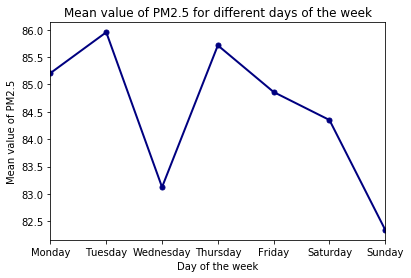

In [45]:
#Mean values of PM2.5 against weekdays
from matplotlib import pyplot as plt
plt.figure()
ax = weekdayMeans["PM2.5"].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of PM2.5 for different days of the week')
ax.set(xlabel='Day of the week', ylabel='Mean value of PM2.5')

plt.show()

<Figure size 432x288 with 0 Axes>

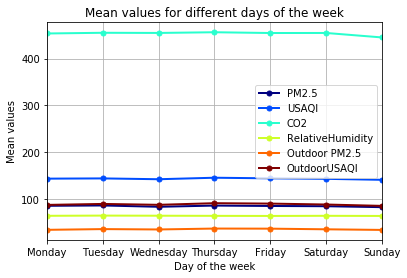

In [46]:
#Mean values against weekdays
from matplotlib import pyplot as plt
plt.figure()
ax = weekdayMeans.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean values for different days of the week')
ax.set(xlabel='Day of the week', ylabel='Mean values')
plt.grid()
plt.show()



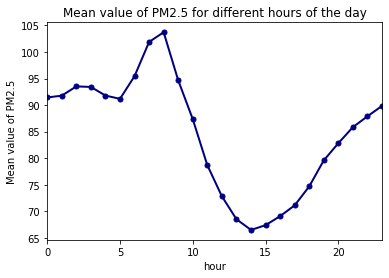

In [47]:
#Mean values of PM2.5 against hours
from matplotlib import pyplot as plt
plt.figure()
ax = hourlyMeans["PM2.5"].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of PM2.5 for different hours of the day')
ax.set(xlabel='hour', ylabel='Mean value of PM2.5')

plt.show()

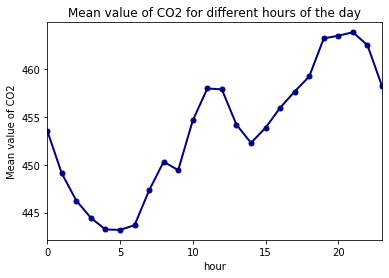

In [48]:
#Mean values of PM2.5 against hours
from matplotlib import pyplot as plt
plt.figure()
ax = hourlyMeans["CO2"].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of CO2 for different hours of the day')
ax.set(xlabel='hour', ylabel='Mean value of CO2')

plt.show()

<Figure size 432x288 with 0 Axes>

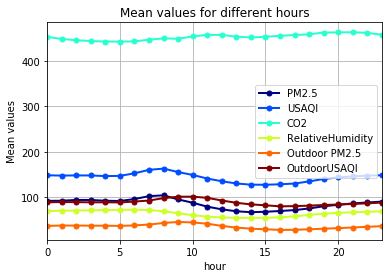

In [49]:
#Mean values against hours
from matplotlib import pyplot as plt
plt.figure()
ax = hourlyMeans.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean values for different hours')
ax.set(xlabel='hour', ylabel='Mean values')
plt.grid()
plt.show()

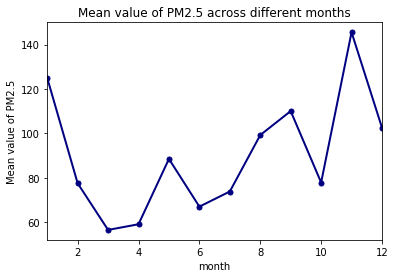

In [50]:
#Mean values of PM2.5 across months
from matplotlib import pyplot as plt
plt.figure()
ax = monthlyMeans["PM2.5"].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of PM2.5 across different months')
ax.set(xlabel='month', ylabel='Mean value of PM2.5')

plt.show()

<Figure size 432x288 with 0 Axes>

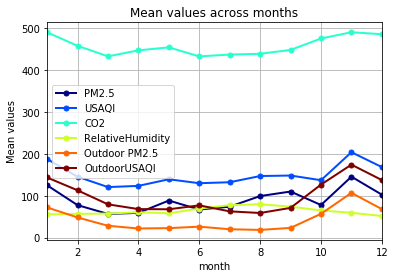

In [51]:
#Mean values across months
from matplotlib import pyplot as plt
plt.figure()
ax = monthlyMeans.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean values across months')
ax.set(xlabel='month', ylabel='Mean values')
plt.grid()
plt.show()

In [52]:
data['year'] = data.Datetime.dt.year
data.head()

,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,weekdayName,hour,month,year
0,0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN,1,Tuesday,13,11,2017
1,1,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,413.0,30.0,62.0,NaN,NaN,1,Tuesday,12,11,2017
2,2,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,416.0,30.0,63.0,NaN,NaN,1,Tuesday,11,11,2017
3,3,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,419.0,29.0,58.0,NaN,NaN,1,Tuesday,10,11,2017
4,4,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,432.0,27.0,70.0,NaN,NaN,1,Tuesday,9,11,2017


In [53]:
data['dayofmonth'] = data.Datetime.dt.day
data.head()

,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,...,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,weekdayName,hour,month,year,dayofmonth
0,0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,...,31.0,59.0,NaN,NaN,1,Tuesday,13,11,2017,7
1,1,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,...,30.0,62.0,NaN,NaN,1,Tuesday,12,11,2017,7
2,2,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,...,30.0,63.0,NaN,NaN,1,Tuesday,11,11,2017,7
3,3,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,...,29.0,58.0,NaN,NaN,1,Tuesday,10,11,2017,7
4,4,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,...,27.0,70.0,NaN,NaN,1,Tuesday,9,11,2017,7


In [54]:
hourYearMeans = data.groupby(['year', 'hour'])[["City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].mean()
monthYearMeans = data.groupby(['year', 'month'])[["City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].mean()
#hourYearMeans.drop(['hour','year'], axis = 1, inplace=True)
#mean values against hours  in year
#display(hourYearMeans)

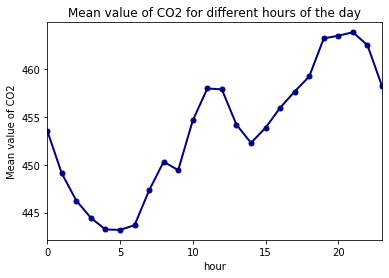

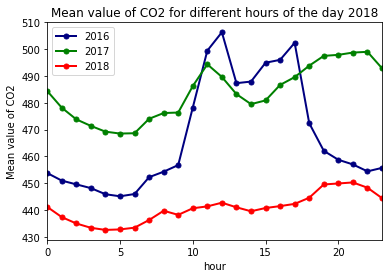

In [55]:
plt.figure()

ax = hourlyMeans["CO2"].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of CO2 for different hours of the day')
ax.set(xlabel='hour', ylabel='Mean value of CO2')

plt.show()

CO2hourYearMeans = hourYearMeans['CO2']
ax = CO2hourYearMeans.loc[2016].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of CO2 for different hours of the day 2016', label = "2016")
ax.set(xlabel='hour', ylabel='Mean value of CO2')

ax = CO2hourYearMeans.loc[2017].plot(lw=2,colormap='ocean',marker='.',markersize=10,title='Mean value of CO2 for different hours of the day 2017', label = "2017")
ax.set(xlabel='hour', ylabel='Mean value of CO2')

ax = CO2hourYearMeans.loc[2018].plot(lw=2,colormap="prism",marker='.',markersize=10,title='Mean value of CO2 for different hours of the day 2018', label = "2018")
ax.set(xlabel='hour', ylabel='Mean value of CO2')

plt.legend()
plt.show()

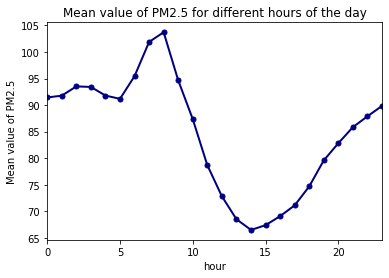

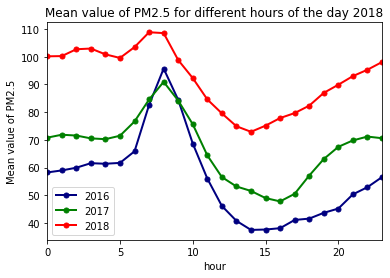

In [56]:
plt.figure()

ax = hourlyMeans["PM2.5"].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of PM2.5 for different hours of the day')
ax.set(xlabel='hour', ylabel='Mean value of PM2.5')

plt.show()

PMhourYearMeans = hourYearMeans['PM2.5']
ax = PMhourYearMeans.loc[2016].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of PM2.5 for different hours of the day 2016', label = "2016")
ax.set(xlabel='hour', ylabel='Mean value of PM2.5')

ax = PMhourYearMeans.loc[2017].plot(lw=2,colormap='ocean',marker='.',markersize=10,title='Mean value of PM2.5 for different hours of the day 2017', label = "2017")
ax.set(xlabel='hour', ylabel='Mean value of PM2.5')

ax = PMhourYearMeans.loc[2018].plot(lw=2,colormap='prism',marker='.',markersize=10,title='Mean value of PM2.5 for different hours of the day 2018', label = "2018")
ax.set(xlabel='hour', ylabel='Mean value of PM2.5')

plt.legend()
plt.show()

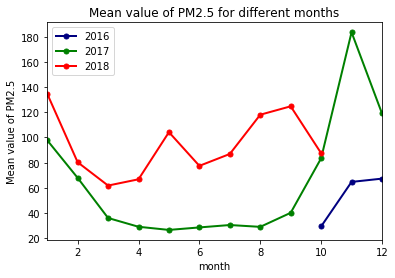

In [57]:
plt.show()

PMhourYearMeans = monthYearMeans['PM2.5']
ax = PMhourYearMeans.loc[2016].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of PM2.5 for different month 2016', label = "2016")
ax.set(xlabel='month', ylabel='Mean value of PM2.5')

ax = PMhourYearMeans.loc[2017].plot(lw=2,colormap='ocean',marker='.',markersize=10,title='Mean value of PM2.5 for different month 2017', label = "2017")
ax.set(xlabel='month', ylabel='Mean value of PM2.5')

ax = PMhourYearMeans.loc[2018].plot(lw=2,colormap='prism',marker='.',markersize=10,title='Mean value of PM2.5 for different months', label = "2018")
ax.set(xlabel='month', ylabel='Mean value of PM2.5')

plt.legend()
plt.show()

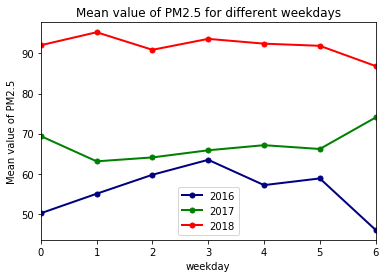

In [58]:
plt.show()

weekYearMeans = data.groupby(['year', 'weekday'])[["City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].mean()
PMhourYearMeans = weekYearMeans['PM2.5']
ax = PMhourYearMeans.loc[2016].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of PM2.5 for different month 2016', label = "2016")
ax.set(xlabel='week', ylabel='Mean value of PM2.5')

ax = PMhourYearMeans.loc[2017].plot(lw=2,colormap='ocean',marker='.',markersize=10,title='Mean value of PM2.5 for different month 2017', label = "2017")
ax.set(xlabel='month', ylabel='Mean value of PM2.5')

ax = PMhourYearMeans.loc[2018].plot(lw=2,colormap='prism',marker='.',markersize=10,title='Mean value of PM2.5 for different weekdays', label = "2018")
ax.set(xlabel='weekday', ylabel='Mean value of PM2.5')

plt.legend()
plt.show()

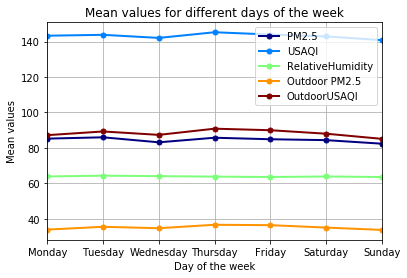

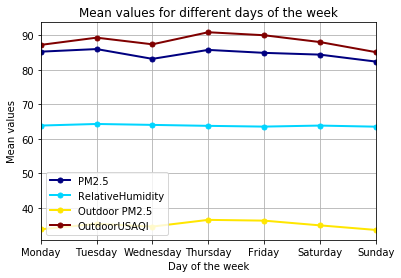

In [59]:
ax = weekdayMeans.drop('CO2', axis = 1).plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean values for different days of the week')
ax.set(xlabel='Day of the week', ylabel='Mean values')
plt.grid()
plt.show()

ax = weekdayMeans.drop(['CO2', 'USAQI'], axis = 1).plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean values for different days of the week')
ax.set(xlabel='Day of the week', ylabel='Mean values')
plt.grid()
plt.show()

In [60]:
dataPort.head(n = 15)

,station,valid,lon,lat,tmpc,relh,drct,sped,vsby,gust_mph,peak_wind_gust_mph
0,OPPS,2016-10-20 00:00,71.5833,34.0167,20.0,68.35,230.0,4.60,2.49,NaN,NaN
1,OPKC,2016-10-20 00:55,67.1333,24.9000,25.0,83.44,250.0,6.90,3.11,NaN,NaN
2,OPPS,2016-10-20 01:00,71.5833,34.0167,20.0,72.92,310.0,6.90,2.49,NaN,NaN
3,OPKC,2016-10-20 01:25,67.1333,24.9000,25.0,83.44,240.0,5.75,2.49,NaN,NaN
4,OPKC,2016-10-20 01:55,67.1333,24.9000,25.0,83.44,250.0,6.90,2.49,NaN,NaN
5,OPLA,2016-10-20 02:00,74.4036,31.5216,19.0,82.74,80.0,5.75,0.62,NaN,NaN
6,OPPS,2016-10-20 02:00,71.5833,34.0167,20.0,68.35,230.0,4.60,2.24,NaN,NaN
7,OPKC,2016-10-20 02:25,67.1333,24.9000,26.0,83.55,240.0,9.20,2.49,NaN,NaN
8,OPLA,2016-10-20 02:30,74.4036,31.5216,19.0,82.74,0.0,0.00,0.62,NaN,NaN
9,OPPS,2016-10-20 03:00,71.5833,34.0167,21.0,64.26,230.0,4.60,1.86,NaN,NaN


In [61]:
dataPort.isna().mean() * 100

station                 0.000000
valid                   0.000000
lon                     0.000000
lat                     0.000000
tmpc                    0.433324
relh                    0.970268
drct                    0.222549
sped                    0.120106
vsby                    0.105976
gust_mph               99.969385
peak_wind_gust_mph    100.000000
dtype: float64

In [62]:
dataP = dataPort.drop(['gust_mph', 'peak_wind_gust_mph'], axis = 1)
dataP.head()

,station,valid,lon,lat,tmpc,relh,drct,sped,vsby
0,OPPS,2016-10-20 00:00,71.5833,34.0167,20.0,68.35,230.0,4.60,2.49
1,OPKC,2016-10-20 00:55,67.1333,24.9000,25.0,83.44,250.0,6.90,3.11
2,OPPS,2016-10-20 01:00,71.5833,34.0167,20.0,72.92,310.0,6.90,2.49
3,OPKC,2016-10-20 01:25,67.1333,24.9000,25.0,83.44,240.0,5.75,2.49
4,OPKC,2016-10-20 01:55,67.1333,24.9000,25.0,83.44,250.0,6.90,2.49


In [63]:
len(dataP) == len(dataP.groupby(['station', 'valid']))

True

In [64]:
dataP.dtypes

station     object
valid       object
lon        float64
lat        float64
tmpc       float64
relh       float64
drct       float64
sped       float64
vsby       float64
dtype: object

In [65]:
dataP['datetime'] = pd.to_datetime(dataP.valid)
dataP.head()

,station,valid,lon,lat,tmpc,relh,drct,sped,vsby,datetime
0,OPPS,2016-10-20 00:00,71.5833,34.0167,20.0,68.35,230.0,4.60,2.49,2016-10-20 00:00:00
1,OPKC,2016-10-20 00:55,67.1333,24.9000,25.0,83.44,250.0,6.90,3.11,2016-10-20 00:55:00
2,OPPS,2016-10-20 01:00,71.5833,34.0167,20.0,72.92,310.0,6.90,2.49,2016-10-20 01:00:00
3,OPKC,2016-10-20 01:25,67.1333,24.9000,25.0,83.44,240.0,5.75,2.49,2016-10-20 01:25:00
4,OPKC,2016-10-20 01:55,67.1333,24.9000,25.0,83.44,250.0,6.90,2.49,2016-10-20 01:55:00


In [66]:
dataP['datetime'] = dataP['datetime'].dt.round('H')
dataP.head()

,station,valid,lon,lat,tmpc,relh,drct,sped,vsby,datetime
0,OPPS,2016-10-20 00:00,71.5833,34.0167,20.0,68.35,230.0,4.60,2.49,2016-10-20 00:00:00
1,OPKC,2016-10-20 00:55,67.1333,24.9000,25.0,83.44,250.0,6.90,3.11,2016-10-20 01:00:00
2,OPPS,2016-10-20 01:00,71.5833,34.0167,20.0,72.92,310.0,6.90,2.49,2016-10-20 01:00:00
3,OPKC,2016-10-20 01:25,67.1333,24.9000,25.0,83.44,240.0,5.75,2.49,2016-10-20 01:00:00
4,OPKC,2016-10-20 01:55,67.1333,24.9000,25.0,83.44,250.0,6.90,2.49,2016-10-20 02:00:00


In [67]:
dataPg1 = dataP.groupby(['station', 'lat', 'lon']).count()
len(dataP.groupby('station')) == len(dataPg1)

True

In [68]:
dataPg1.head( n = 10 )

,,,valid,tmpc,relh,drct,sped,vsby,datetime
station,lat,lon,,,,,,,
OPFA,31.3650,72.9948,28,28,28,28,28,28,28
OPKC,24.9000,67.1333,28238,28171,28051,28134,28216,28218,28238
OPLA,31.5216,74.4036,18021,17778,17649,17990,17989,17997,18021
OPPS,34.0167,71.5833,25082,25062,24964,25070,25069,25073,25082
OPRN,33.6166,73.0992,13556,13518,13409,13514,13521,13519,13556


In [69]:
# OPFA Faisalabad
# OPKC Karachi
# OPLA Lahore
# OPPS Peshawar
# OPRN Islamabad

In [70]:
serialToCity = {'OPFA': 'Faisalabad', 'OPKC': 'Karachi', 'OPLA': 'Lahore', 'OPPS': 'Peshawar', 'OPRN': 'Islamabad'}

In [71]:
sorted(data.City.unique())[1:-1] == sorted(serialToCity.values())

True

In [72]:
dataP['City'] = dataP.station.apply(lambda x : serialToCity[x])
dataP.head()

,station,valid,lon,lat,tmpc,relh,drct,sped,vsby,datetime,City
0,OPPS,2016-10-20 00:00,71.5833,34.0167,20.0,68.35,230.0,4.60,2.49,2016-10-20 00:00:00,Peshawar
1,OPKC,2016-10-20 00:55,67.1333,24.9000,25.0,83.44,250.0,6.90,3.11,2016-10-20 01:00:00,Karachi
2,OPPS,2016-10-20 01:00,71.5833,34.0167,20.0,72.92,310.0,6.90,2.49,2016-10-20 01:00:00,Peshawar
3,OPKC,2016-10-20 01:25,67.1333,24.9000,25.0,83.44,240.0,5.75,2.49,2016-10-20 01:00:00,Karachi
4,OPKC,2016-10-20 01:55,67.1333,24.9000,25.0,83.44,250.0,6.90,2.49,2016-10-20 02:00:00,Karachi


In [73]:
dataA = dataP.drop(['valid','station', 'lon', 'lat'], axis = 1)
dataA.head()

,tmpc,relh,drct,sped,vsby,datetime,City
0,20.0,68.35,230.0,4.60,2.49,2016-10-20 00:00:00,Peshawar
1,25.0,83.44,250.0,6.90,3.11,2016-10-20 01:00:00,Karachi
2,20.0,72.92,310.0,6.90,2.49,2016-10-20 01:00:00,Peshawar
3,25.0,83.44,240.0,5.75,2.49,2016-10-20 01:00:00,Karachi
4,25.0,83.44,250.0,6.90,2.49,2016-10-20 02:00:00,Karachi


In [74]:
dataAmean = dataA.groupby(['City', 'datetime']).mean()

In [75]:
df = data.merge( dataAmean, how = 'left', left_on = ['Datetime', 'City'], right_on = ['datetime', 'City'])
len(df) == len(data)

True

In [76]:
df.head()

,Unnamed: 0,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,...,weekdayName,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
0,0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,...,Tuesday,13,11,2017,7,29.0,45.675,235.0,6.900,3.73
1,1,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,...,Tuesday,12,11,2017,7,31.5,31.370,235.0,8.625,3.73
2,2,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,...,Tuesday,11,11,2017,7,33.0,26.100,235.0,9.775,3.73
3,3,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,...,Tuesday,10,11,2017,7,34.0,23.040,235.0,10.925,3.73
4,4,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,...,Tuesday,9,11,2017,7,34.0,26.310,250.0,7.475,3.42


In [77]:
dfclean = df.drop(['longitude', 'latitude'], axis = 1)
dfclean.corr('pearson')

,Unnamed: 0,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
Unnamed: 0,1.000000,0.091687,0.131670,-0.083959,0.144354,0.069118,-0.242303,-0.268616,0.000301,0.006728,-0.074937,0.575808,0.008131,0.165392,0.036620,0.124095,0.079876,0.104547
PM2.5,0.091687,1.000000,0.983958,0.027486,-0.072775,0.066674,0.018157,0.007135,-0.003572,-0.027653,0.033740,0.058286,0.035454,-0.043217,0.018017,-0.031250,-0.041053,-0.136740
USAQI,0.131670,0.983958,1.000000,0.030581,-0.098369,0.045063,0.055607,0.052340,-0.003517,-0.026819,0.018966,0.068649,0.031231,-0.067012,-0.001090,-0.058724,-0.067713,-0.187501
CO2,-0.083959,0.027486,0.030581,1.000000,-0.192953,-0.156395,0.096073,0.122489,-0.016233,0.047042,0.021874,-0.146641,0.010318,-0.207147,0.011998,-0.131370,-0.143867,-0.113866
Temperature,0.144354,-0.072775,-0.098369,-0.192953,1.000000,-0.086007,-0.308266,-0.347729,-0.001569,0.176204,0.172250,0.169769,0.006072,0.749449,-0.088381,0.271694,0.357858,0.296197
RelativeHumidity,0.069118,0.066674,0.045063,-0.156395,-0.086007,1.000000,-0.302088,-0.385434,-0.008856,-0.148807,0.202105,0.131015,-0.028039,0.156729,0.607023,0.156793,0.147840,-0.117166
Outdoor PM2.5,-0.242303,0.018157,0.055607,0.096073,-0.308266,-0.302088,1.000000,0.937275,0.000762,-0.070742,-0.058942,-0.309220,-0.011643,-0.318533,-0.227648,-0.287109,-0.201629,-0.221319
OutdoorUSAQI,-0.268616,0.007135,0.052340,0.122489,-0.347729,-0.385434,0.937275,1.000000,-0.008420,-0.053714,-0.101712,-0.368011,-0.003694,-0.367510,-0.280281,-0.344307,-0.246044,-0.250705
weekday,0.000301,-0.003572,-0.003517,-0.016233,-0.001569,-0.008856,0.000762,-0.008420,1.000000,-0.001147,0.005062,-0.004542,-0.007071,0.000026,-0.009640,0.003751,-0.013077,0.019843
hour,0.006728,-0.027653,-0.026819,0.047042,0.176204,-0.148807,-0.070742,-0.053714,-0.001147,1.000000,-0.002531,0.001068,-0.001912,-0.072634,0.104357,0.037858,-0.023137,0.130924
